In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("breast-cancer_csv.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

le = LabelEncoder()
y = le.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_encoded, y)


DecisionTreeClassifier(random_state=42)


Confusion Matrix - Split 1:
 [[30 11]
 [ 6 11]]

Classification Report - Split 1:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.50      0.65      0.56        17

    accuracy                           0.71        58
   macro avg       0.67      0.69      0.67        58
weighted avg       0.74      0.71      0.72        58


Confusion Matrix - Split 2:
 [[35  5]
 [ 6 11]]

Classification Report - Split 2:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.69      0.65      0.67        17

    accuracy                           0.81        57
   macro avg       0.77      0.76      0.77        57
weighted avg       0.80      0.81      0.81        57


Confusion Matrix - Split 3:
 [[26 14]
 [11  6]]

Classification Report - Split 3:
               precision    recall  f1-score   support

           0       0.70      0.65      

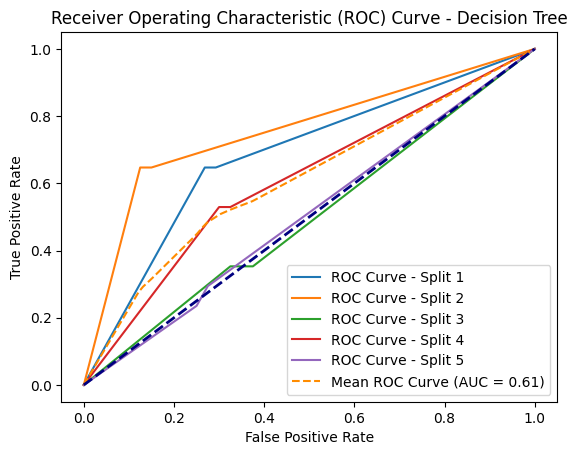

In [23]:
# Perform 5-fold cross-validation and get predicted probabilities
for i, (train, test) in enumerate(cv.split(X_encoded, y), 1):
    model = decision_tree_model.fit(X_encoded.iloc[train], y[train])
    y_probs = model.predict_proba(X_encoded.iloc[test])[:, 1]
    
    # Assuming y_pred is the predicted labels
    y_pred = model.predict(X_encoded.iloc[test])

    # Print confusion matrix and classification report
    print(f"\nConfusion Matrix - Split {i}:\n", confusion_matrix(y[test], y_pred))
    print(f"\nClassification Report - Split {i}:\n", classification_report(y[test], y_pred))
    
    fpr, tpr, thresholds = roc_curve(y[test], y_probs)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    
    # Plot ROC curve for each split
    plt.plot(fpr, tpr, label=f'ROC Curve - Split {i}')
 
# Calculate and plot the mean ROC curve
mean_tpr /= cv.get_n_splits()
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='darkorange', linestyle='--', label=f'Mean ROC Curve (AUC = {mean_auc:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


In [24]:
import joblib

# Export the model to a file
model_filename = "decision_tree_model.joblib"
joblib.dump(decision_tree_model, model_filename)
print(f"\nModel exported to: {model_filename}")

# Import the model from the file
imported_model = joblib.load(model_filename)



Model exported to: decision_tree_model.joblib
